In [107]:
import sys,os
import time
import collections
sys.path.append(os.path.abspath("../../"))
sys.path.append(os.path.abspath('../../modules/'))
import healpy as h
from scipy.interpolate import interp1d
from modules.flat_sky_codes import tangent_plane_analysis as tpa
from modules.flat_sky_codes import flat_sky_analysis as fsa
from modules.simulate.spatial_template import sim_cluster as sc
import collections
from modules import cnc_bias_study
%pylab notebook

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        
figpath="./results/new_results_160221/with_zero_pad_planck_coloured_noise/"
ensure_dir(figpath)

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'char']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [108]:
cnc=cnc_bias_study.matched_filter_anasim(192,2048,theta500_steps=20,white=False,apowid=0.03)
cl_loc=[96,96]

<IPython.core.display.Javascript object>


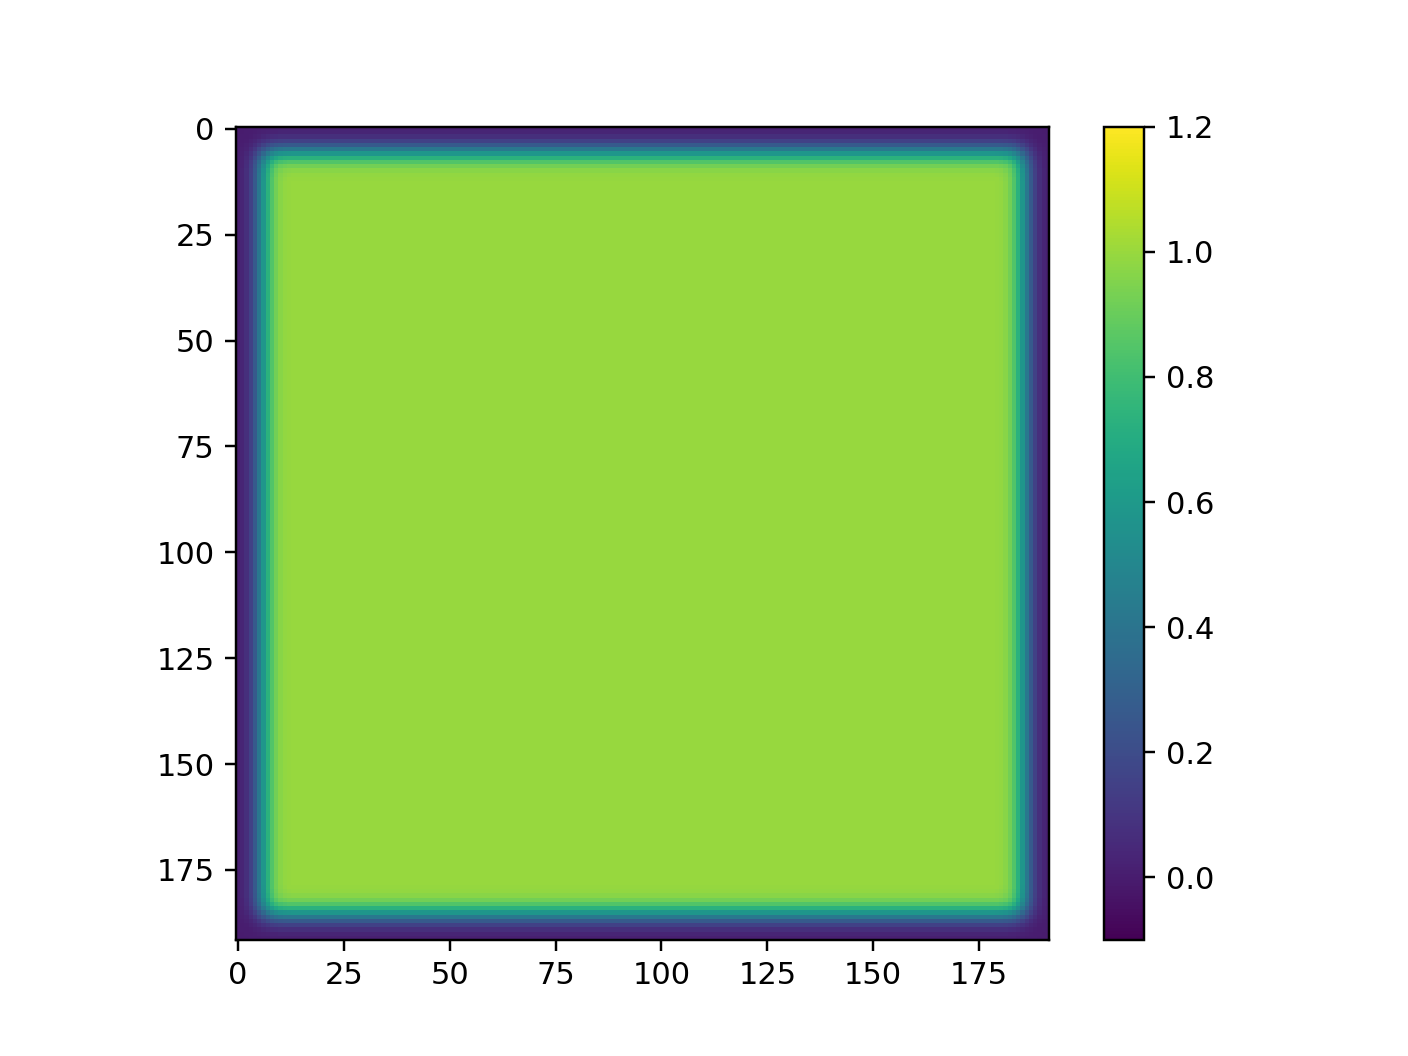

In [109]:
figure()
imshow(cnc.emask,vmin=-0.1,vmax=1.2)
colorbar()
figname=figpath + "zero_pad.pdf"
savefig(figname,bbox_inches="tight")

In [20]:
# Soln order :  [bf_snr,bf_yc,bf_err,bf_theta500,bf_xy]

# Iterative matched filter

In [117]:
nrlz=20
lbls=["LK_NVK","NK_NVK","LK","NK","R","RI"]
# col=["r","b","m","g","c","k"]

In [122]:
snr=np.zeros((len(lbls),len(cnc.theta_array),nrlz),float)
snr_stat=np.zeros((len(lbls),len(cnc.theta_array),2),float)

In [123]:
for i in range(nrlz):
#     data,noise,yc_true=cnc.simulate_ymap(15.,0.35e-5,xy=cl_loc)
    data,noise,yc_true=cnc.simulate_ymap(15.,1e-5,xy=cl_loc)
    
    soln_lk_nvk,res_lk_nvk=cnc.mf_ideal_loc_known(data,xy=cl_loc,noise=[])
    snr[0,:,i]=res_lk_nvk[0].values()
    soln_nvk,res_nvk=cnc.mf_ideal(data,noise=[])
    snr[1,:,i]=res_nvk[0].values()
    
    soln_lk,res_lk=cnc.mf_ideal_loc_known(data,xy=cl_loc,noise=noise)
    snr[2,:,i]=res_lk[0].values()
    soln,res=cnc.mf_ideal(data,noise=noise)
    snr[3,:,i]=res[0].values()
    
    soln_r,res_r=cnc.mf_real(data)
    snr[4,:,i]=res_r[0].values()
    soln_ir,res_ir=cnc.mf_real_iterative(data,snr_thr=5.)
    snr[5,:,i]=res_ir[0].values()

In [124]:
for i in range(len(lbls)):
    snr_stat[i,:,0]=np.mean(snr[i,],axis=1)
    snr_stat[i,:,1]=np.std(snr[i,],axis=1)

<IPython.core.display.Javascript object>


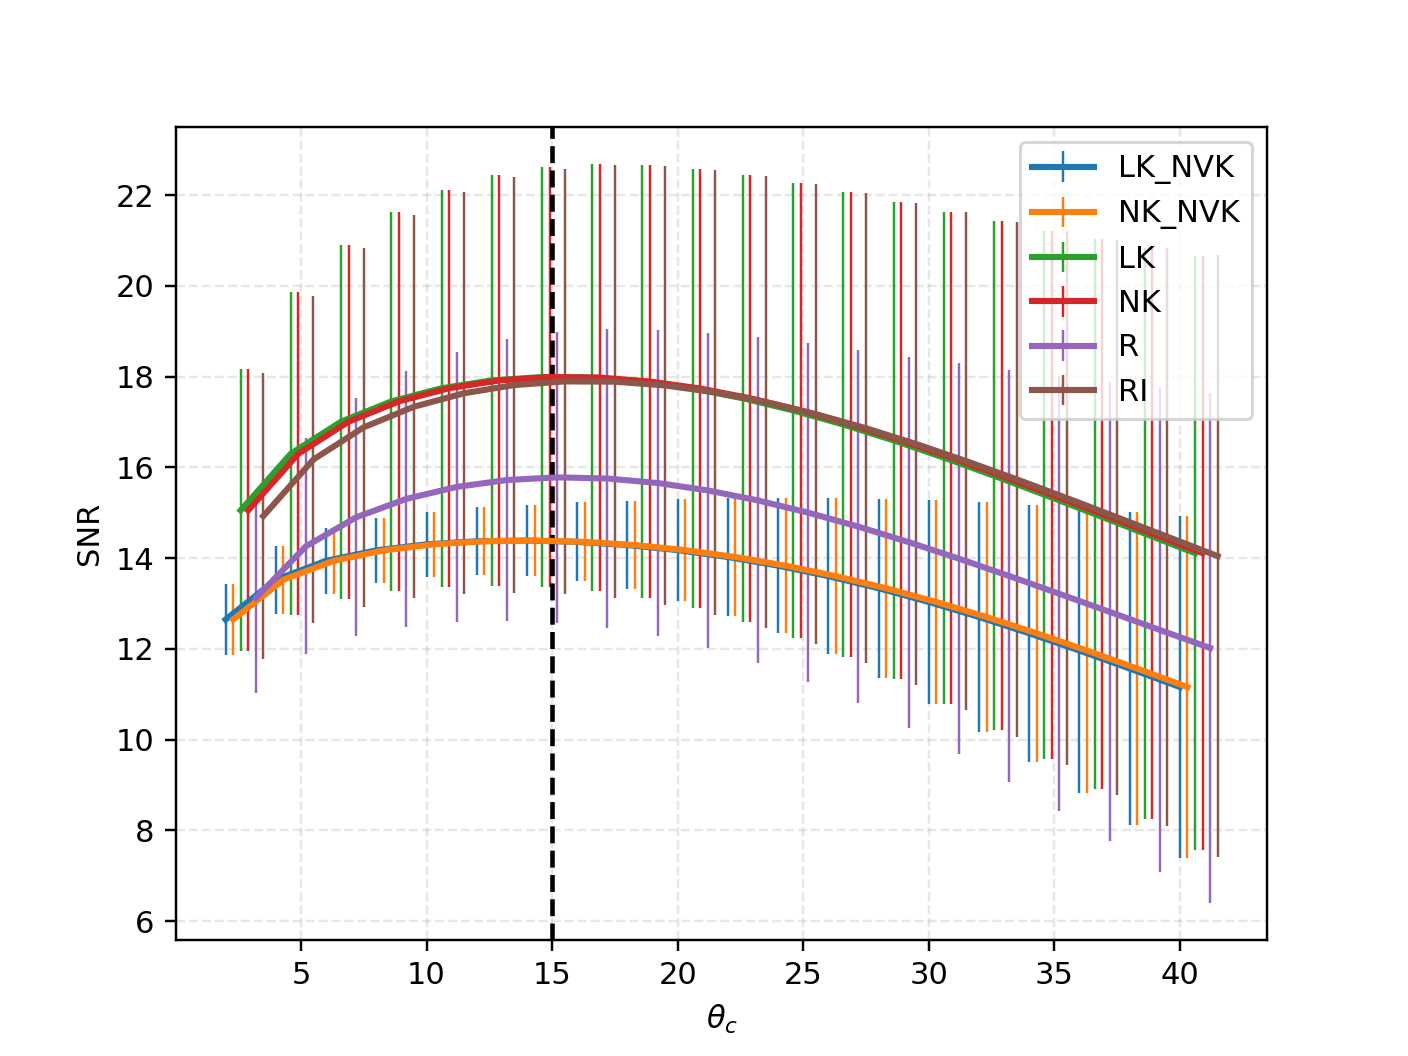

<IPython.core.display.Javascript object>


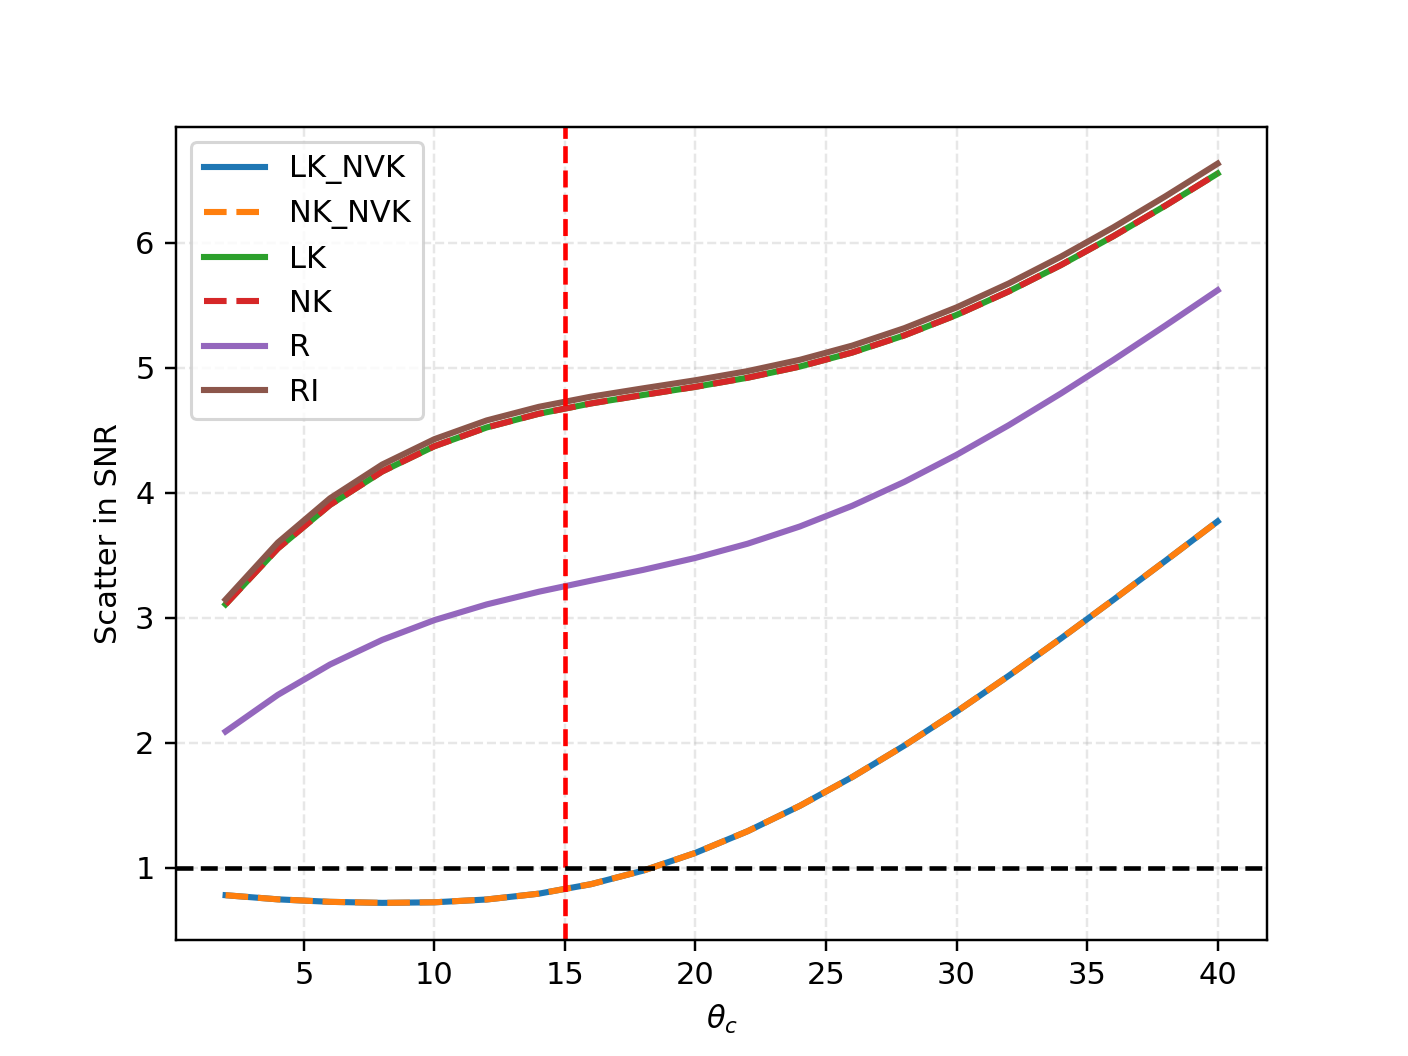

In [125]:
figure()
for i,lbl in enumerate(lbls):
    errorbar(cnc.theta_array+0.3*i,snr_stat[i,:,0],yerr=snr_stat[i,:,1],lw=2,label=lbl,elinewidth=0.8)
axvline(15,c="k",linestyle="dashed")
ylabel("SNR",fontsize=10)
xlabel(r"$\theta_c$",fontsize=10)
legend(loc=0)
grid(which="both",linestyle="dashed",alpha=0.3)

# figname=figpath + "noise_vs_noise_variance_lowq.pdf"
figname=figpath + "noise_vs_noise_variance.pdf"
savefig(figname,bbox_inches="tight")

figure()
i=0 ; plot(cnc.theta_array,snr_stat[i,:,1],lw=2,label=lbls[i])
i=1 ; plot(cnc.theta_array,snr_stat[i,:,1],"--",lw=2,label=lbls[i])
i=2 ; plot(cnc.theta_array,snr_stat[i,:,1],"-",lw=2,label=lbls[i])
i=3 ; plot(cnc.theta_array,snr_stat[i,:,1],"--",lw=2,label=lbls[i])
i=4 ; plot(cnc.theta_array,snr_stat[i,:,1],"-",lw=2,label=lbls[i])
i=5 ; plot(cnc.theta_array,snr_stat[i,:,1],"-",lw=2,label=lbls[i])
axvline(15,c="r",linestyle="dashed")
axhline(1,c="k",linestyle="dashed")
ylabel("Scatter in SNR",fontsize=10)
xlabel(r"$\theta_c$",fontsize=10)
legend(loc=0)
grid(which="both",linestyle="dashed",alpha=0.3)

# figname=figpath + "scatter_in_snr_lowq.pdf"
figname=figpath + "scatter_in_snr.pdf"
savefig(figname,bbox_inches="tight")



## All known

In [126]:
snr_ak=np.zeros((2,len(cnc.theta_array),nrlz),float)

for ith,thetac in enumerate(cnc.theta_array):
    for i in range(nrlz):
        data,noise,yc_true=cnc.simulate_ymap(thetac,0.5e-5,xy=cl_loc)
        soln=cnc.mf_ideal_all_known(data,theta500=thetac,xy=cl_loc,noise=[])
        snr_ak[0,ith,i]=soln[0]
        soln=cnc.mf_ideal_all_known(data,theta500=thetac,xy=cl_loc,noise=noise)
        snr_ak[1,ith,i]=soln[0]

In [127]:
snr_ak_stat=np.zeros((2,len(cnc.theta_array),2),float)
snr_ak_stat[0,:,0]=np.mean(snr_ak[0,],axis=1)
snr_ak_stat[0,:,1]=np.std(snr_ak[0,],axis=1)
snr_ak_stat[1,:,0]=np.mean(snr_ak[1,],axis=1)
snr_ak_stat[1,:,1]=np.std(snr_ak[1,],axis=1)

<IPython.core.display.Javascript object>


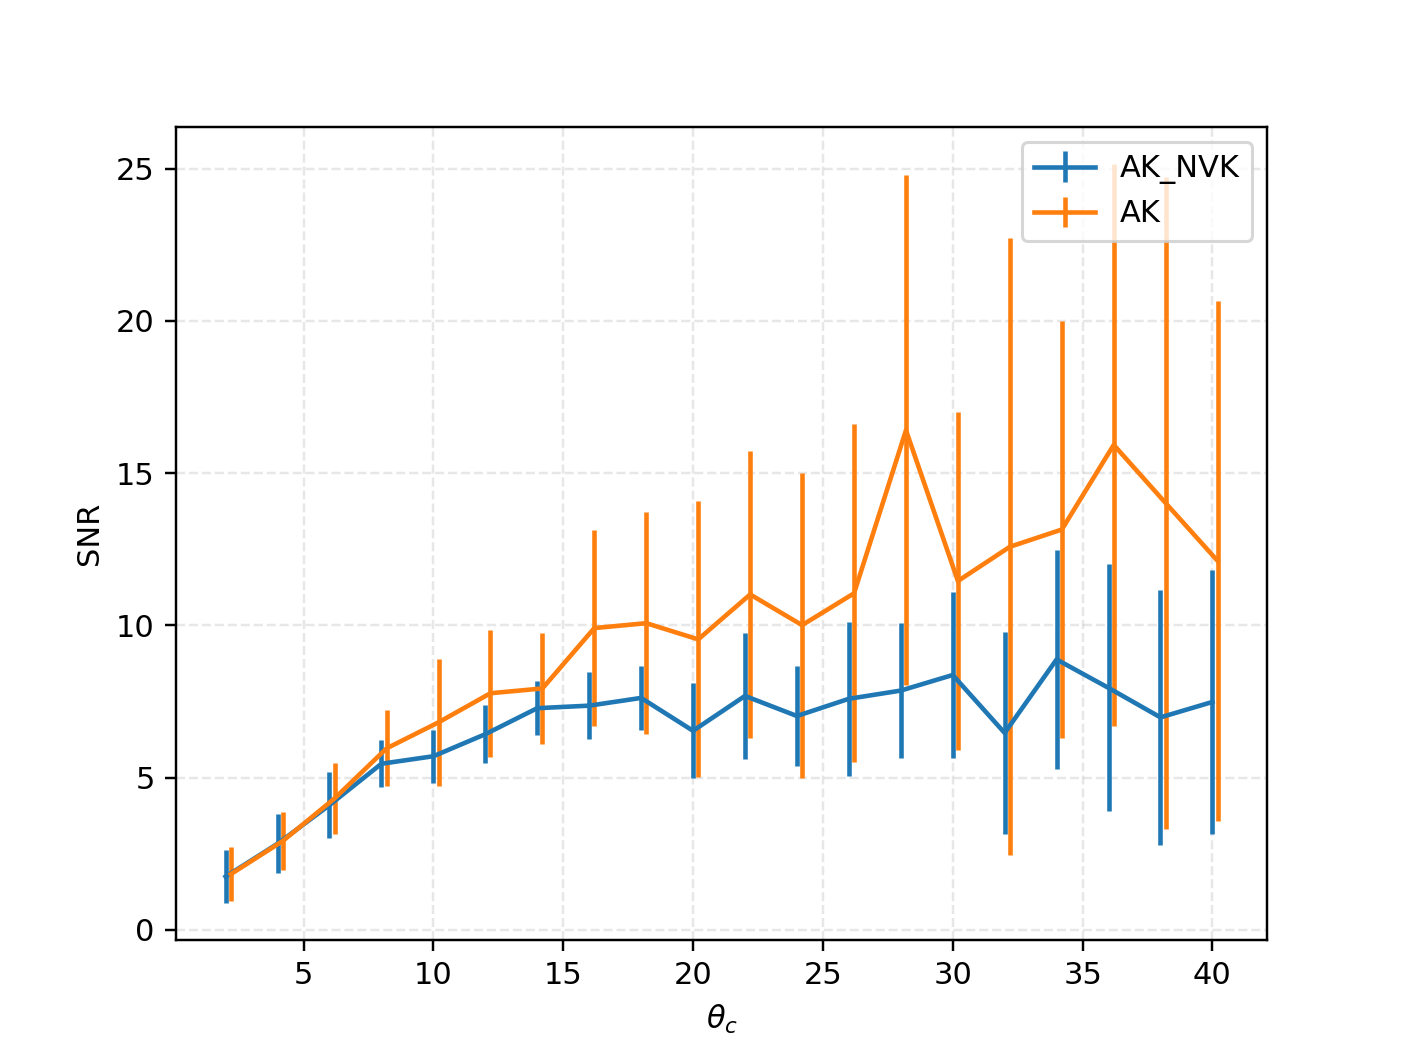

<IPython.core.display.Javascript object>


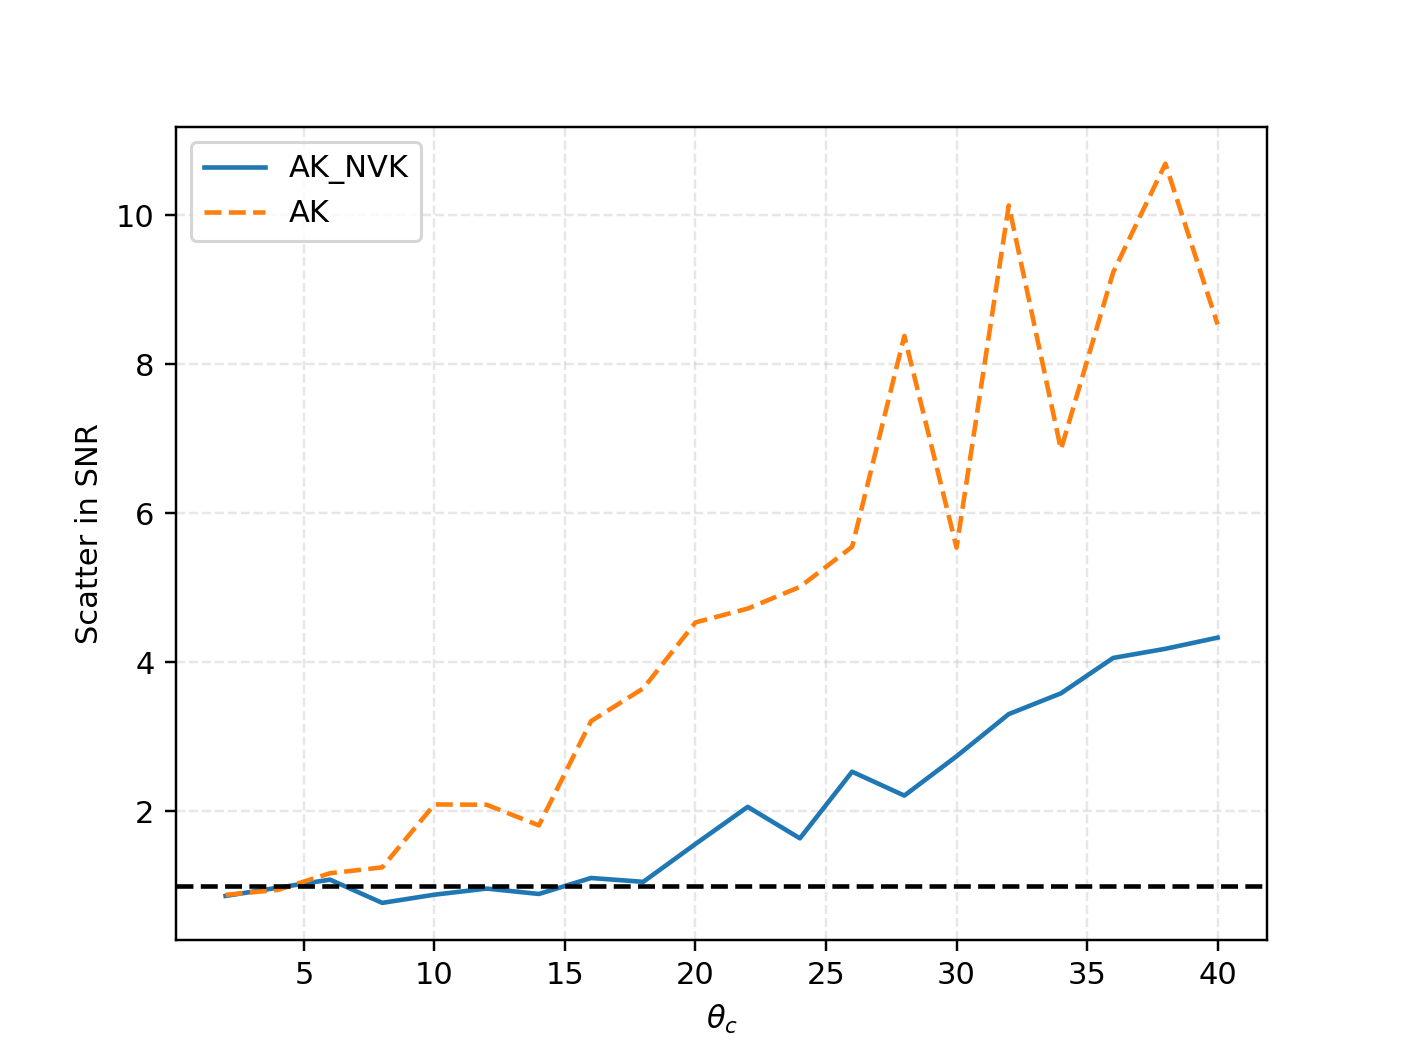

In [128]:
figure()
errorbar(cnc.theta_array,snr_ak_stat[0,:,0],yerr=snr_ak_stat[0,:,1],label="AK_NVK")
errorbar(cnc.theta_array+0.2,snr_ak_stat[1,:,0],yerr=snr_ak_stat[1,:,1],label="AK")
ylabel("SNR",fontsize=10)
xlabel(r"$\theta_c$",fontsize=10)
legend(loc=0)
grid(which="both",linestyle="dashed",alpha=0.3)
figname=figpath + "ak_noise_vs_noise_variance.pdf"
savefig(figname,bbox_inches="tight")

figure()
plot(cnc.theta_array,snr_ak_stat[0,:,1],label="AK_NVK")
plot(cnc.theta_array,snr_ak_stat[1,:,1],"--",label="AK")
ylabel("Scatter in SNR",fontsize=10)
xlabel(r"$\theta_c$",fontsize=10)
legend(loc=0)
axhline(1.,c="k",linestyle="dashed")
grid(which="both",linestyle="dashed",alpha=0.3)
figname=figpath + "ak_scatter_in_snr.pdf"
savefig(figname,bbox_inches="tight")

# Setup simulations

In [129]:
nrlz=30
yarr=np.logspace(-6,-5,15)

yc_true=np.zeros((len(yarr)),np.float64)
noise=np.zeros((nrlz,cnc.npix,cnc.npix),np.float64)
ymap=np.zeros((len(yarr),cnc.npix,cnc.npix),np.float64)

for iy,yc in enumerate(yarr):
    temp_data,temp_noise,yc_true[iy]=cnc.simulate_ymap(12.,yc,xy=cl_loc)
    ymap[iy,:,:]=temp_data-temp_noise
    
for i in range(nrlz):
    noise[i,:,:] = cnc.simulate_noise()

# Analysis assuming the noise variance is known

In [130]:
start=time.time()
cl_char_nvk=collections.OrderedDict()
cl_char_nvk["snr"]=np.zeros((len(yarr),6,nrlz)) 
cl_char_nvk["yc"]=np.zeros((len(yarr),6,nrlz)) 
cl_char_nvk["thetac"]=np.zeros((len(yarr),6,nrlz))

for iy,yc in enumerate(yarr):
    for i in range(nrlz):
        # Randomize noise index here.
        data = ymap[iy,] + noise[i,]
        data_ft=fsa.map2alm(data,cnc.reso)
        soln_ak=cnc.mf_ideal_all_known(data,12.,xy=cl_loc,data_ft=data_ft)
        soln_sk=cnc.mf_ideal_size_known(data,12.,data_ft=data_ft)
        soln_lk,res_lk=cnc.mf_ideal_loc_known(data,xy=cl_loc,data_ft=data_ft)
        soln,res=cnc.mf_ideal(data,data_ft=data_ft)
        soln_r,res_r=cnc.mf_real(data,data_ft=data_ft)
        soln_ir,res_ir=cnc.mf_real_iterative(data,snr_thr=5,data_ft=data_ft)
        cl_char_nvk["snr"][iy,:,i]=np.array([soln_ak[0],soln_sk[0],soln_lk[0],soln[0],soln_r[0],soln_ir[0]])
        cl_char_nvk["yc"][iy,:,i]=np.array([soln_ak[1],soln_sk[1],soln_lk[1],soln[1],soln_r[1],soln_ir[1]])
        cl_char_nvk["thetac"][iy,:,i]=np.array([soln_ak[3],soln_sk[3],soln_lk[3],soln[3],soln_r[3],soln_ir[3]])
        
print time.time()-start

831.413747072


In [131]:
char_stat_nvk=collections.OrderedDict()
char_stat_nvk["snr"]=np.zeros((len(yarr),6,2))
char_stat_nvk["yc"]=np.zeros((len(yarr),6,2))
char_stat_nvk["thetac"]=np.zeros((len(yarr),6,2))

for iy,yc in enumerate(yarr):
    for i in range(6):
        for k in cl_char_nvk.keys():
            char_stat_nvk[k][iy,i,0]=np.mean(cl_char_nvk[k][iy,i,:])
            char_stat_nvk[k][iy,i,1]=np.std(cl_char_nvk[k][iy,i,:])
    
    
lbls=["AK","SK","LK","NK Ideal","Real","Real iter"]

In [132]:
char_stat_nvk["snr"][:,0,0]

array([ 1.37275699,  1.60797433,  1.88524115,  2.21207459,  2.59733559,
        3.05146918,  3.58678761,  4.21780418,  4.96162672,  5.83842141,
        6.87195948,  8.09026174,  9.52635824, 11.21918374, 13.21463335])

<IPython.core.display.Javascript object>


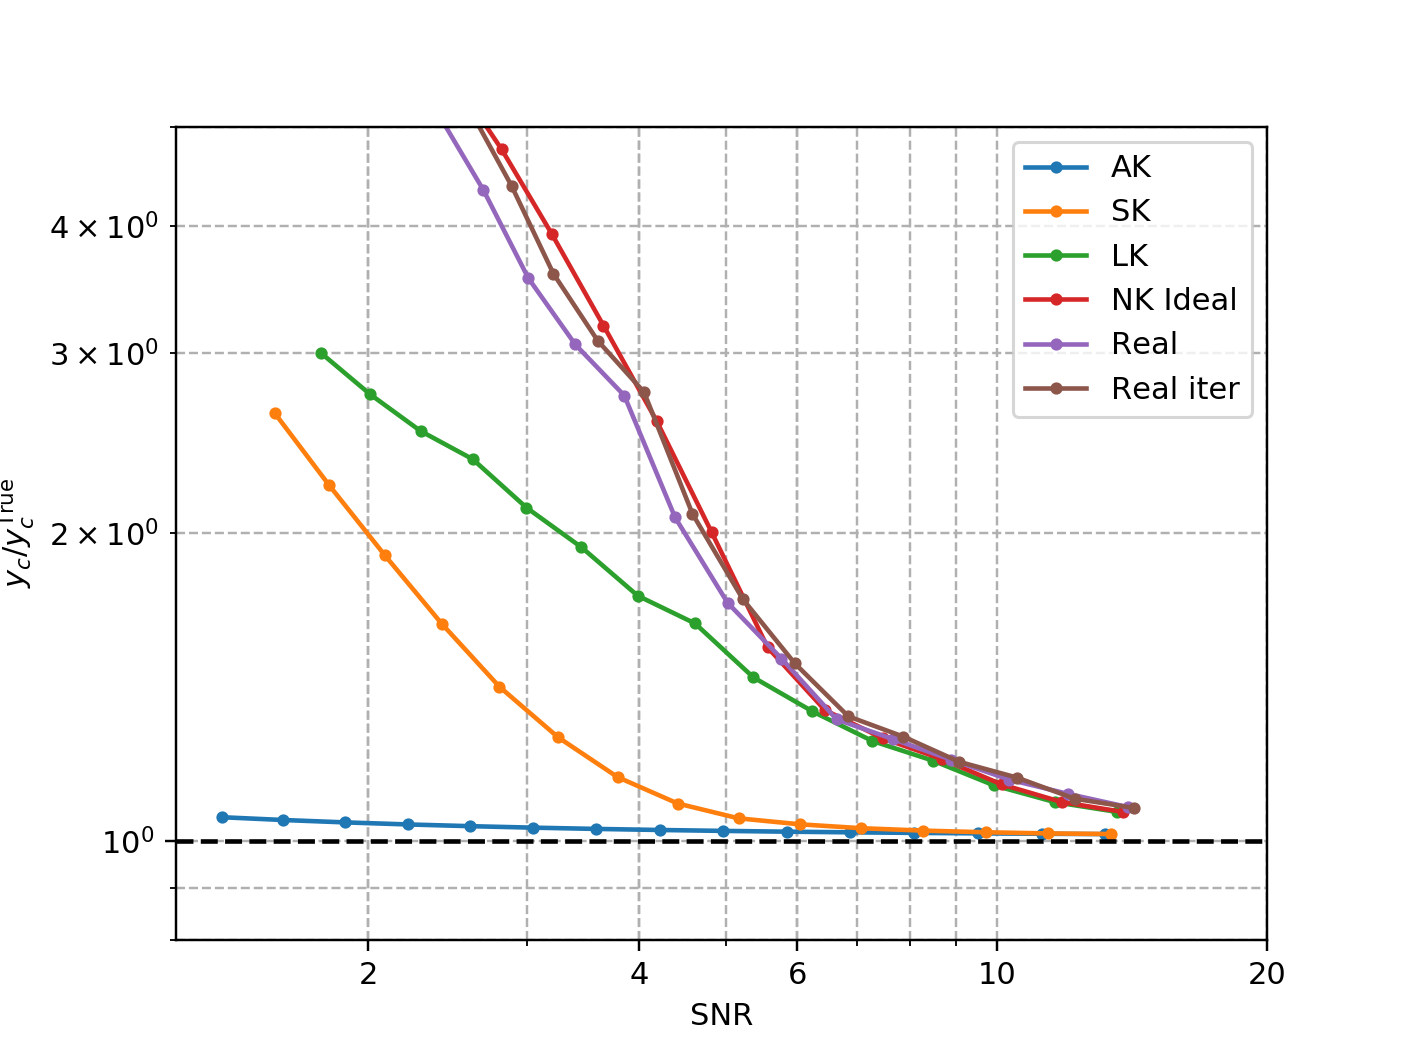

<IPython.core.display.Javascript object>


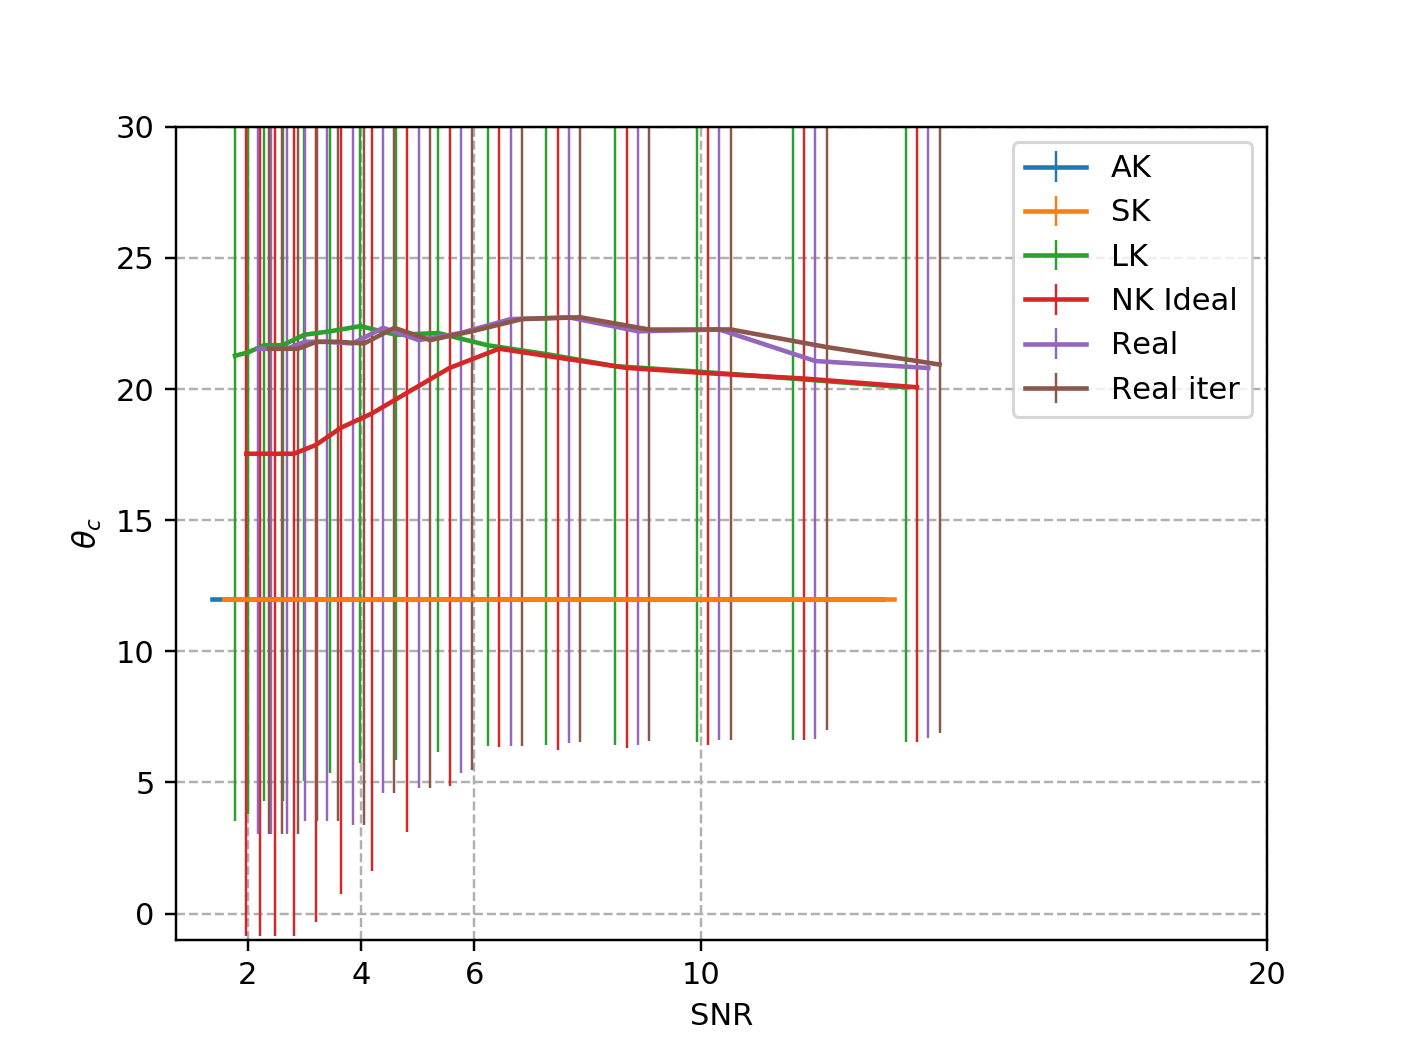

<IPython.core.display.Javascript object>


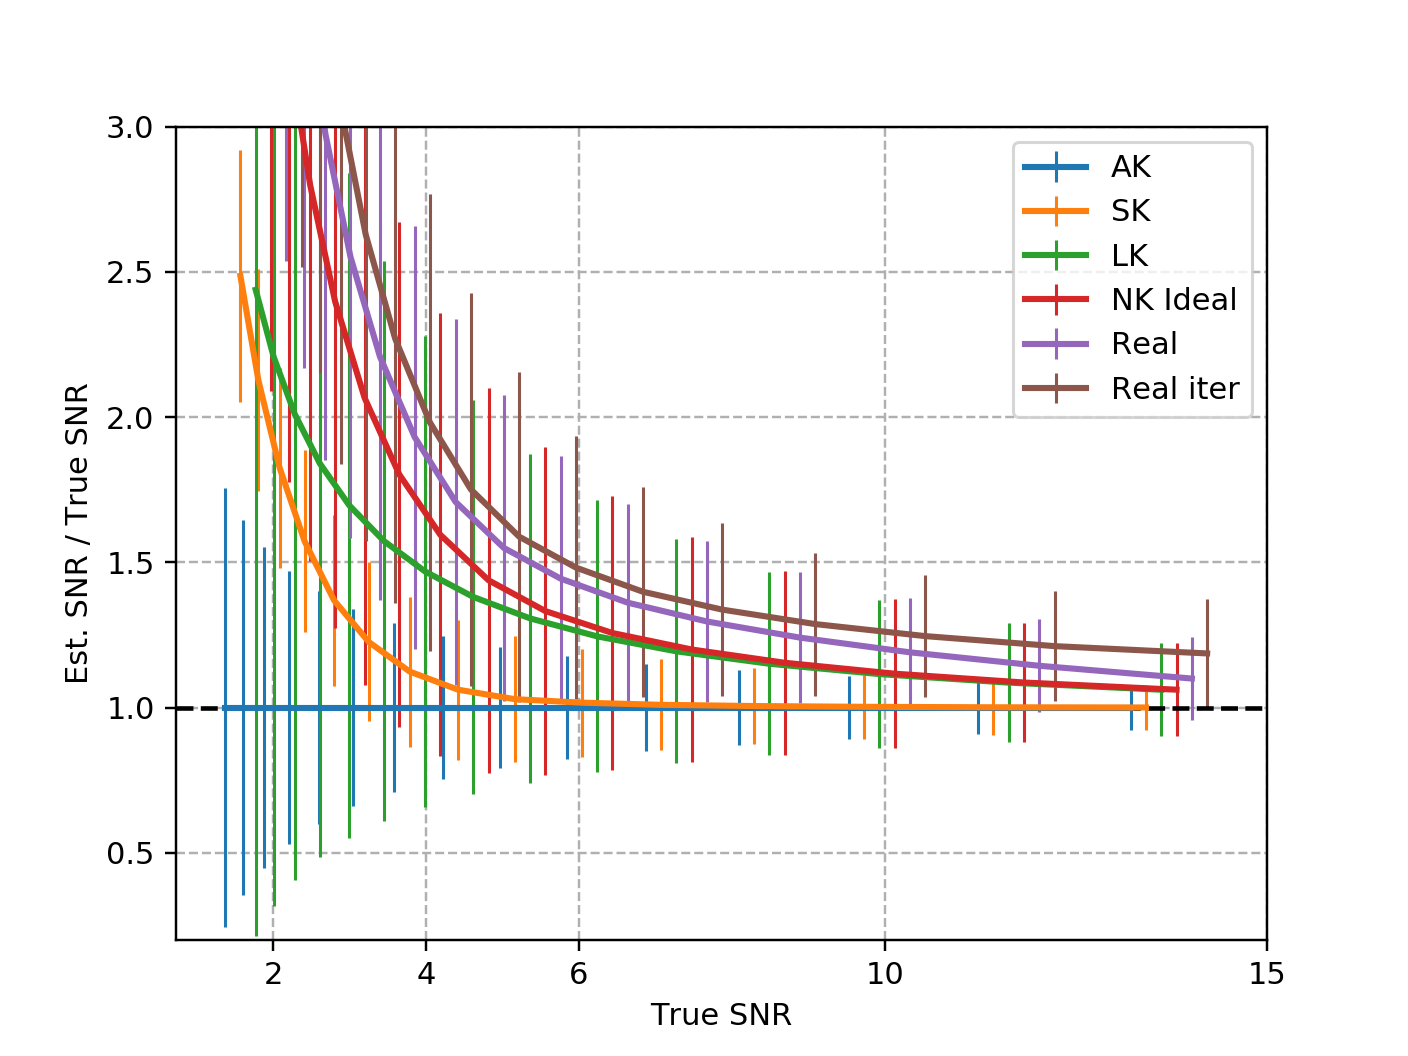

In [133]:
char="yc"
figure()
for i, lbl in enumerate(lbls):
#     errorbar(char_stat_nvk["snr"][:,0,0]+i*0.2,char_stat_nvk[char][:,i,0]/yc_true,yerr=char_stat_nvk[char][:,i,1]/yc_true,label=lbl,elinewidth=0.8)
    plot(char_stat_nvk["snr"][:,0,0]+i*0.2,char_stat_nvk[char][:,i,0]/yc_true,".-",label=lbl)
legend(loc=0,fontsize=10)
axhline(1,linestyle="dashed",c="k")
loglog()
xticks([2,4,6,10,20],[2,4,6,10,20])
ylim(0.8,5)
xlabel("SNR",fontsize=10)
ylabel(r"$y_c/y_c^{\rm True}$",fontsize=10)
grid(which="both",linestyle="dashed")
figname=figpath + "yc_revovery_nvk.pdf"
savefig(figname,bbox_inches="tight")


char="thetac"
figure()
for i, lbl in enumerate(lbls):
#     plot(char_stat_nvk["snr"][:,0,0],char_stat_nvk[char][:,i,0],".-",label=lbl)
    errorbar(char_stat_nvk["snr"][:,0,0]+i*0.2,char_stat_nvk[char][:,i,0],yerr=char_stat_nvk[char][:,i,1],label=lbl,elinewidth=0.8)
# axhline(1,linestyle="dashed",c="k")
legend(loc=0,fontsize=10)
# loglog()
xticks([2,4,6,10,20],[2,4,6,10,20])
ylim(-1,30)
xlabel("SNR",fontsize=10)
ylabel(r"$\theta_c$",fontsize=10)
grid(which="both",linestyle="dashed")
figname=figpath + "size_revovery_nvk.pdf"
savefig(figname,bbox_inches="tight")

char="snr"
figure()
for i, lbl in enumerate(lbls):
    errorbar(char_stat_nvk["snr"][:,0,0]+i*0.2,char_stat_nvk[char][:,i,0]/char_stat_nvk[char][:,0,0],yerr=char_stat_nvk["snr"][:,i,1]/char_stat_nvk[char][:,0,0],lw=2,label=lbl,elinewidth=1)
legend()
legend(loc=0,fontsize=10)
axhline(1,c="k",linestyle="dashed")
# loglog()
xticks([2,4,6,10,15],[2,4,6,10,15])
ylim(0.2,3)
xlabel("True SNR",fontsize=10)
ylabel("Est. SNR / True SNR",fontsize=10)
grid(which="both",linestyle="dashed")
figname=figpath + "snr_revovery_nvk.pdf"
savefig(figname,bbox_inches="tight")

# Analyse assuming noise realization is known

In [134]:
start=time.time()
cl_char=collections.OrderedDict()
cl_char_cdof=collections.OrderedDict()
cl_char["snr"]=np.zeros((len(yarr),6,nrlz)) 
cl_char["yc"]=np.zeros((len(yarr),6,nrlz)) 
cl_char["thetac"]=np.zeros((len(yarr),6,nrlz))

for iy,yc in enumerate(yarr):
    for i in range(nrlz):
        # Randomize noise index here.
        data = ymap[iy,] + noise[i,]
        data_ft=fsa.map2alm(data,cnc.reso)
        soln_ak=cnc.mf_ideal_all_known(data,12.,xy=cl_loc,data_ft=data_ft,noise=noise[i,])
        soln_sk=cnc.mf_ideal_size_known(data,12.,data_ft=data_ft,noise=noise[i,])
        soln_lk,res_lk=cnc.mf_ideal_loc_known(data,xy=cl_loc,data_ft=data_ft,noise=noise[i,])
        soln,res=cnc.mf_ideal(data,data_ft=data_ft,noise=noise[i,])
        soln_r,res_r=cnc.mf_real(data,data_ft=data_ft)
        soln_ir,res_ir=cnc.mf_real_iterative(data,snr_thr=5,data_ft=data_ft)
        cl_char["snr"][iy,:,i]=np.array([soln_ak[0],soln_sk[0],soln_lk[0],soln[0],soln_r[0],soln_ir[0]])
        cl_char["yc"][iy,:,i]=np.array([soln_ak[1],soln_sk[1],soln_lk[1],soln[1],soln_r[1],soln_ir[1]])
        cl_char["thetac"][iy,:,i]=np.array([soln_ak[3],soln_sk[3],soln_lk[3],soln[3],soln_r[3],soln_ir[3]])
        
print time.time()-start

844.476663113


In [135]:
char_stat=collections.OrderedDict()
char_stat["snr"]=np.zeros((len(yarr),6,2))
char_stat["yc"]=np.zeros((len(yarr),6,2))
char_stat["thetac"]=np.zeros((len(yarr),6,2))

for iy,yc in enumerate(yarr):
    for i in range(6):
        for k in cl_char.keys():
            char_stat[k][iy,i,0]=np.mean(cl_char[k][iy,i,:])
            char_stat[k][iy,i,1]=np.std(cl_char[k][iy,i,:])
    
    
lbls=["AK","SK","LK","NK Ideal","Real","Real iter"]

<IPython.core.display.Javascript object>


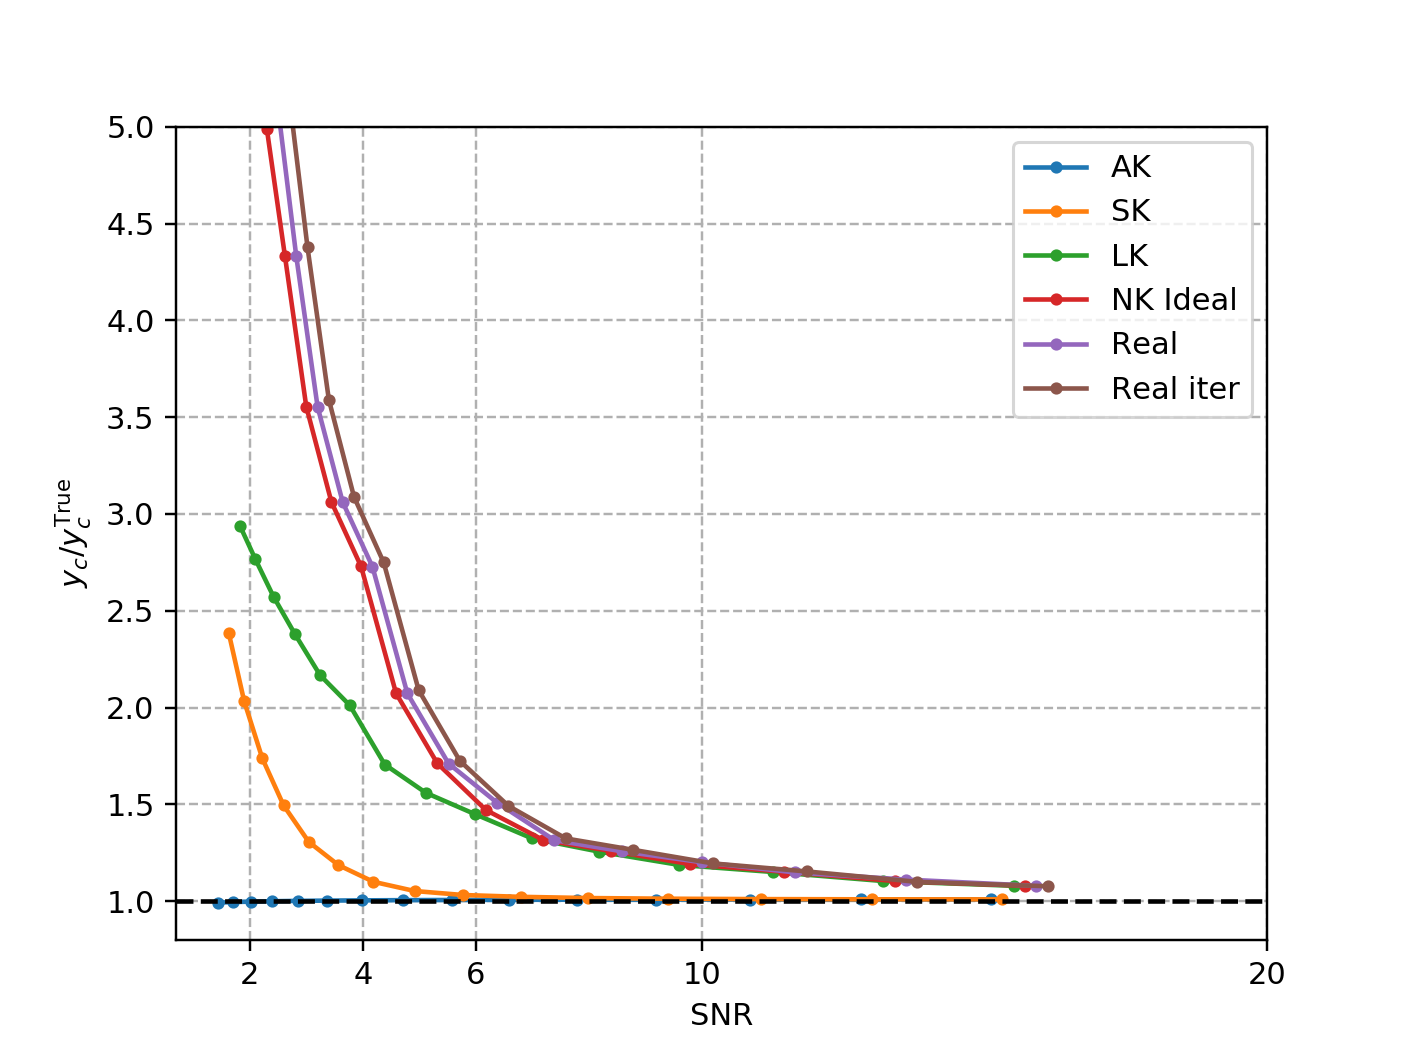

<IPython.core.display.Javascript object>


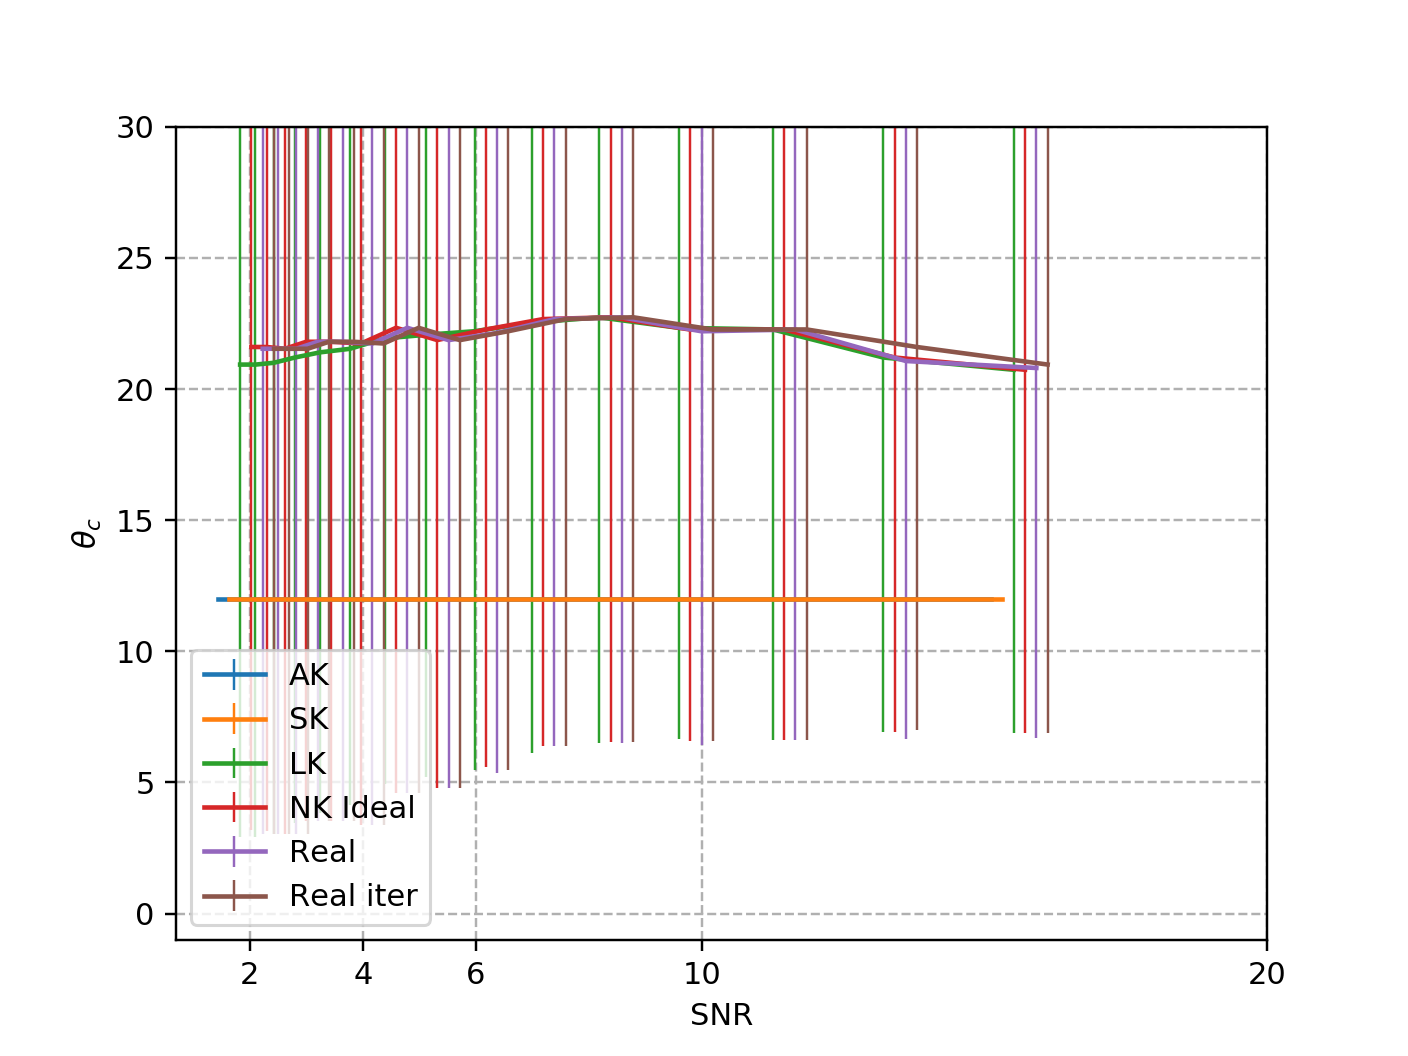

<IPython.core.display.Javascript object>


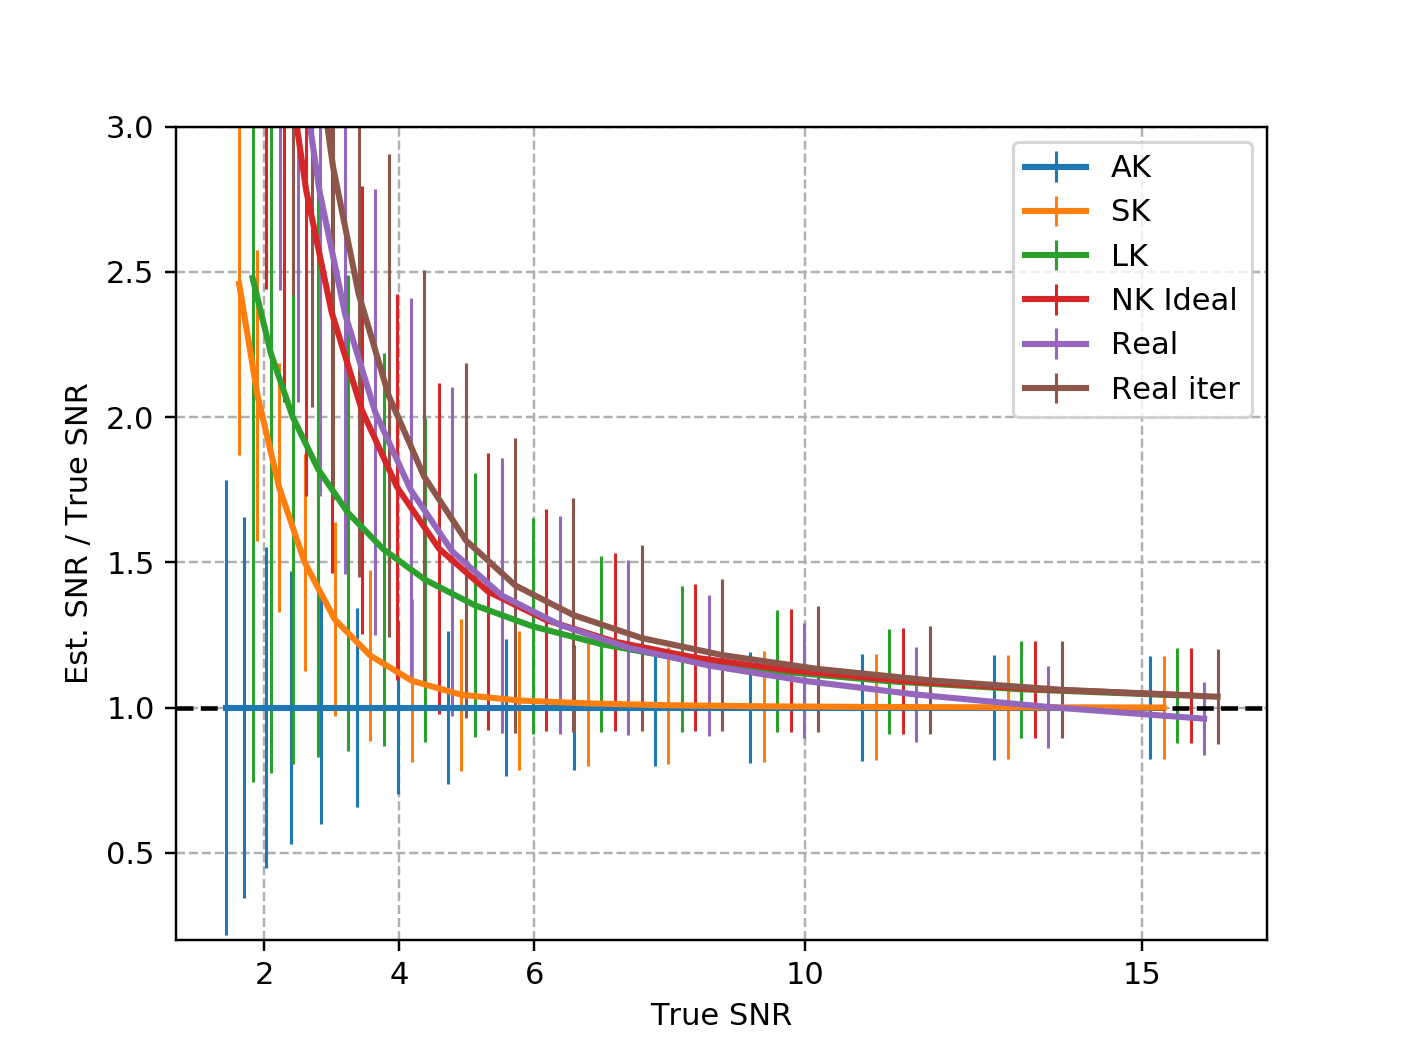

In [136]:
char="yc"
figure()
for i, lbl in enumerate(lbls):
    plot(char_stat["snr"][:,0,0]+i*0.2,char_stat[char][:,i,0]/yc_true,".-",label=lbl)
legend(loc=0,fontsize=10)
axhline(1,linestyle="dashed",c="k")

xticks([2,4,6,10,20],[2,4,6,10,20])
# yticks([2,4,6,8],[2,4,6,8])
ylim(0.8,5)
# loglog()
xlabel("SNR",fontsize=10)
ylabel(r"$y_c/y_c^{\rm True}$",fontsize=10)
grid(which="both",linestyle="dashed")
figname=figpath + "yc_revovery.pdf"
savefig(figname,bbox_inches="tight")


char="thetac"
figure()
for i, lbl in enumerate(lbls):
    errorbar(char_stat["snr"][:,0,0]+i*0.2,char_stat[char][:,i,0],yerr=char_stat[char][:,i,1],label=lbl,elinewidth=0.8)
# axhline(1,linestyle="dashed",c="k")
legend(loc=0,fontsize=10)
# loglog()
xticks([2,4,6,10,20],[2,4,6,10,20])
ylim(-1,30)
xlabel("SNR",fontsize=10)
ylabel(r"$\theta_c$",fontsize=10)
grid(which="both",linestyle="dashed")
figname=figpath + "size_revovery.pdf"
savefig(figname,bbox_inches="tight")

char="snr"
figure()
for i, lbl in enumerate(lbls):
    errorbar(char_stat["snr"][:,0,0]+i*0.2,char_stat[char][:,i,0]/char_stat[char][:,0,0],yerr=char_stat["snr"][:,i,1]/char_stat[char][:,0,0],lw=2,label=lbl,elinewidth=1)
legend()
legend(loc=0,fontsize=10)
axhline(1,c="k",linestyle="dashed")
# loglog()
xticks([2,4,6,10,15],[2,4,6,10,15])
ylim(0.2,3)
xlabel("True SNR",fontsize=10)
ylabel("Est. SNR / True SNR",fontsize=10)
grid(which="both",linestyle="dashed")
figname=figpath + "snr_revovery.pdf"
savefig(figname,bbox_inches="tight")

<IPython.core.display.Javascript object>


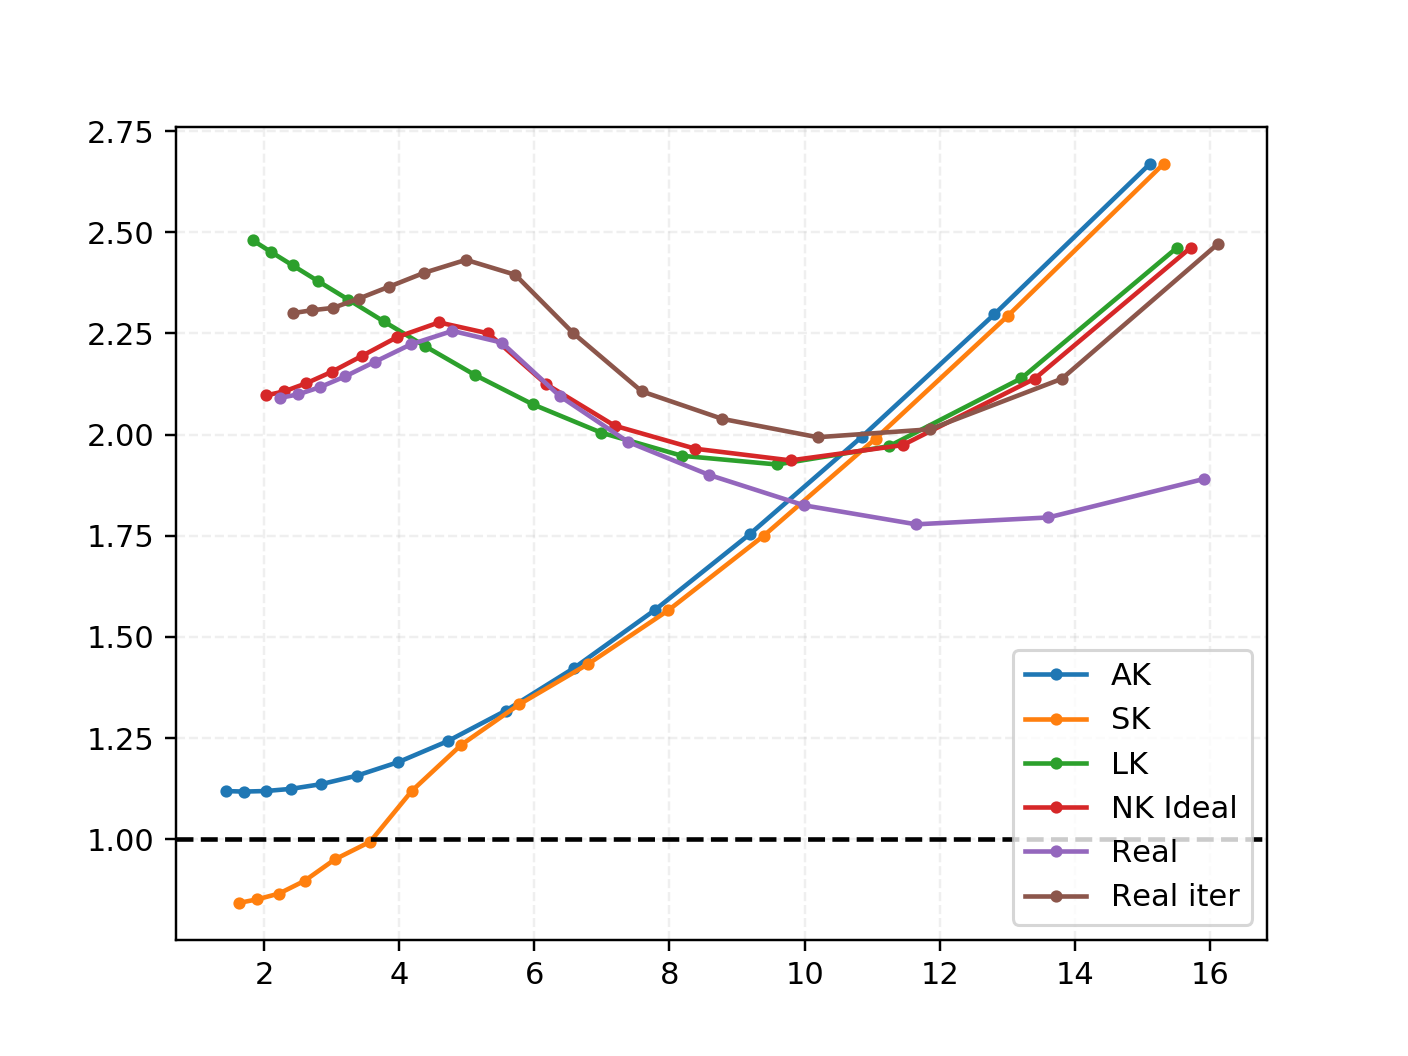

In [137]:
char="snr"
figure()
for i, lbl in enumerate(lbls):
    plot(char_stat["snr"][:,0,0]+i*0.2,char_stat[char][:,i,1],".-",label=lbl)
axhline(1,linestyle="dashed",c="k")
legend(loc=0)
grid(which="both",linestyle="dashed",alpha=0.2)

<IPython.core.display.Javascript object>


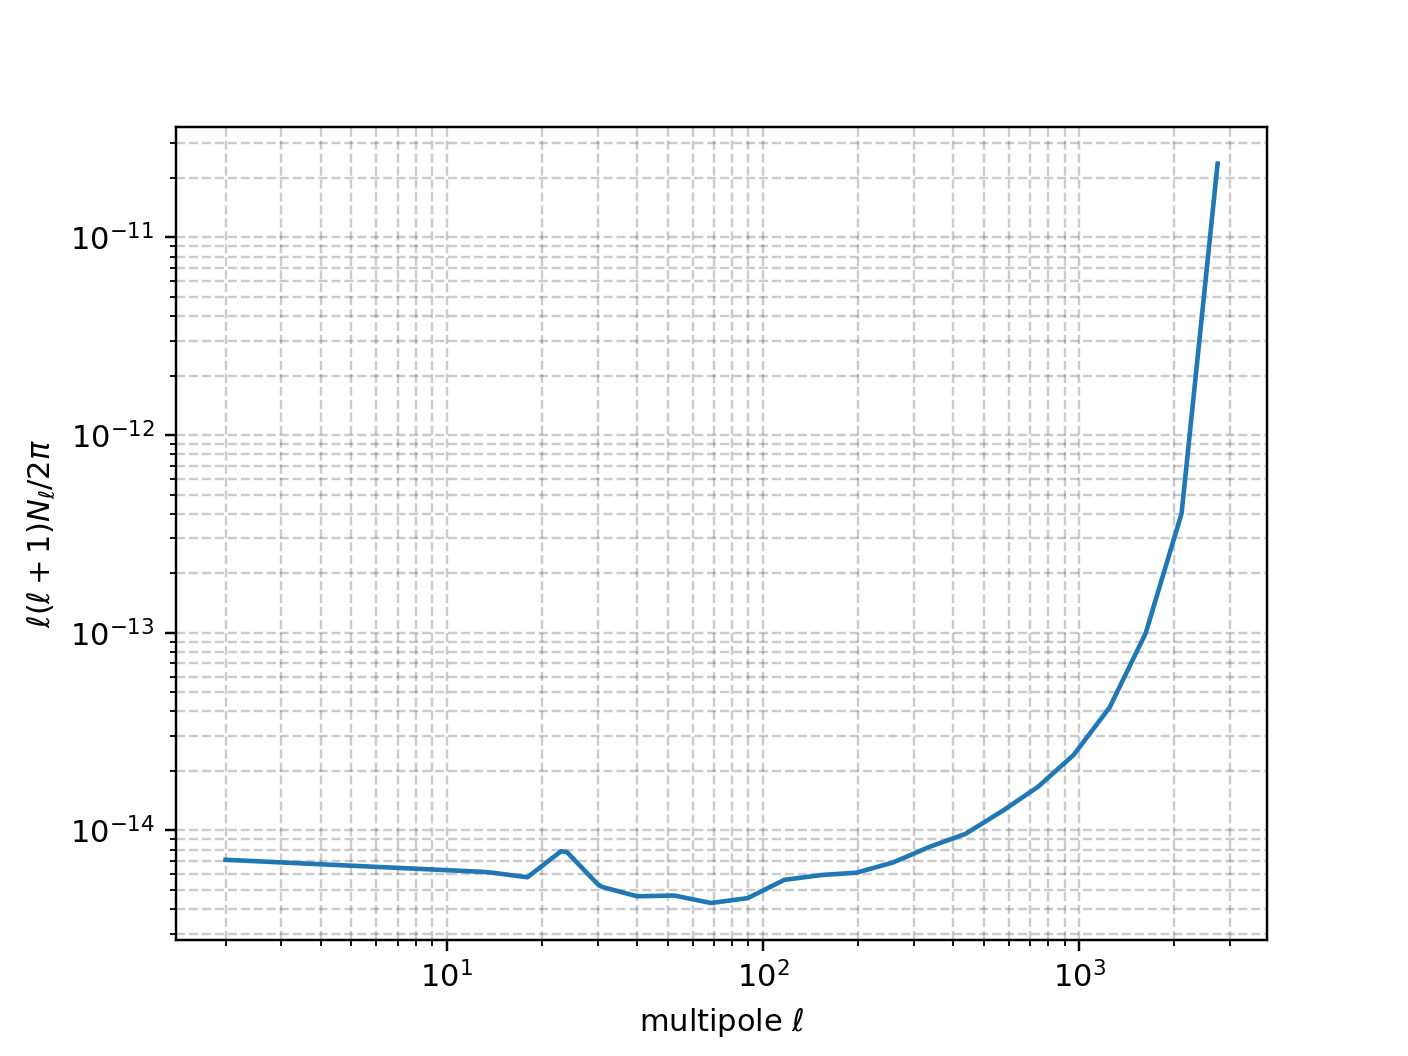

In [138]:
figure()
fl=cnc.ell*(cnc.ell+1)/(2.*pi)
plot(cnc.ell,fl*cnc.planck_ymap_noise)
loglog()
ylabel(r"$\ell(\ell+1)N_{\ell}/2\pi$")
xlabel(r"multipole $\ell$")
grid(which="both",linestyle="--",c="k",alpha=0.2)
figname=figpath + "planck_ymap_nl.pdf"
savefig(figname,bbox_inches="tight")

In [139]:
filename=figpath + "planck_yy_noise.txt"
title_str="# Planck y-map noise angular power spectrum"
f=open(filename,"wb")
f.write("%-18s %-18s\n \n" % ("# ell","N_ell*1e12"))
for i in range(np.size(cnc.ell)):
    f.write("%-18.15f %-18.15f \n" % (cnc.ell[i],cnc.planck_ymap_noise[i]*1e12))
f.close()

In [140]:
data=loadtxt(filename)

<IPython.core.display.Javascript object>


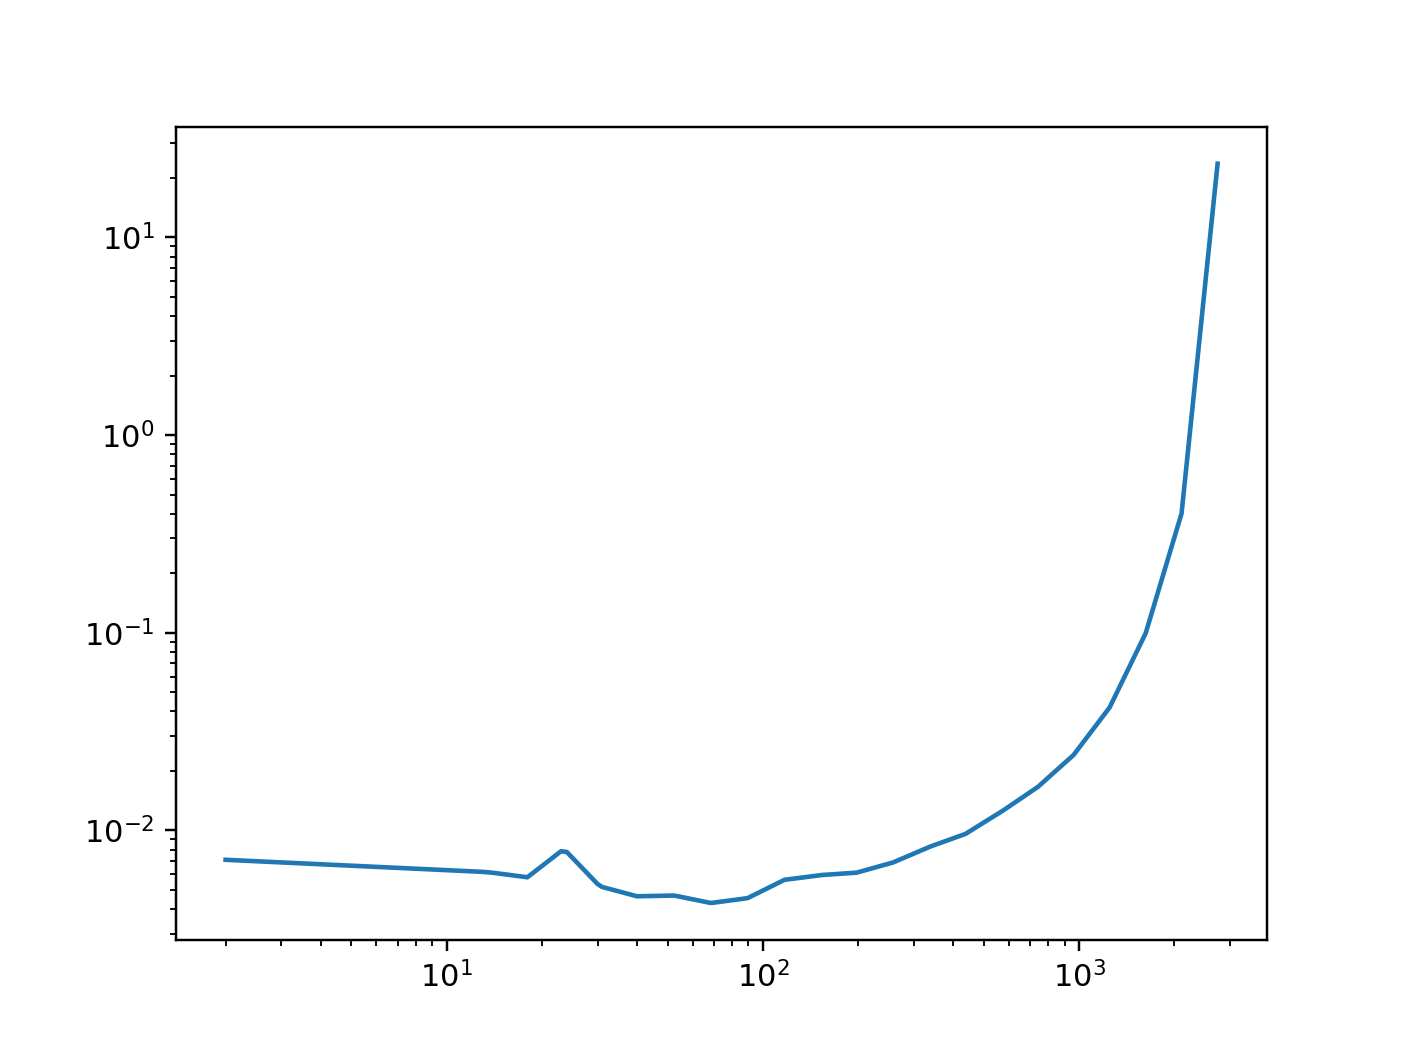

[]

In [141]:
figure()
plot(data[:,0],data[:,1]*(data[:,0]*(data[:,0]+1))/(2.*pi))
loglog()